## 1. Business Understanding

### Overview

SyriaTel is a telecommunications company that, like many others in the industry, faces the challenge of customer churn—when customers discontinue their service or switch to competitors. Retaining existing customers is significantly more cost-effective than acquiring new ones, making churn reduction a key business priority.

This project aims to analyze customer behavior and build a predictive machine learning model that can identify customers at risk of churning. By understanding the factors that contribute to churn, the company can design targeted retention strategies, optimize customer service efforts, and ultimately improve profitability.

### Business Objective

The primary objective is to develop a robust and interpretable classification model that can:

- Accurately predict whether a customer is likely to churn.
- Provide insights into the key drivers of churn.
- Support data-driven decision-making for retention initiatives.

### Problem Statement

Customer churn is a significant threat to recurring revenue. SyriaTel seeks a solution that not only predicts churn but also offers actionable insights to reduce it. This project focuses on exploring historical customer data to uncover patterns and build a model that distinguishes between loyal and churning customers.

### Goals

- Understand the distribution and structure of customer-related features.
- Explore relationships between customer attributes and churn behavior.
- Engineer relevant features that improve model performance.
- Train and evaluate multiple classification models using industry-standard metrics.
- Interpret model results to inform business actions.

### Success Criteria

The success of this project will be measured by the following:

- **Technical Accuracy**: High performance in metrics such as precision, recall, F1-score, and AUC-ROC, with special emphasis on recall to minimize false negatives.
- **Interpretability**: Clear identification of the most influential features contributing to customer churn.
- **Business Impact**: Practical recommendations based on model results to inform marketing, customer service, and product strategy.

### Constraints and Assumptions

- The dataset is historical and may contain imbalances (e.g., more loyal than churning customers).
- The model will focus on binary classification (Churn vs. No Churn).
- The data is assumed to be representative of current customer behavior.

This analysis will form the foundation for SyriaTel’s churn management strategy by helping the business proactively retain customers and allocate resources effectively.


### 2. Data Understanding

Before diving into modeling or analysis, it is crucial to develop a solid understanding of the dataset. This step helps reveal the structure, shape, content, and quality of the data and informs the necessary preprocessing steps required before performing any meaningful analysis.

We will start by conducting an initial inspection that answers key questions such as:

- What are the data types of each feature, and are they appropriate?
- Are there any missing or null values?
- What is the shape of the dataset?
- What are the basic descriptive statistics of numerical features?

#### 2.1 Load and Inspect the Dataset

In this subsection, we will perform the following tasks:

- **Load the dataset** using `pandas` into a DataFrame.
- **Preview** the first and last few records using `.head()` and `.tail()` to understand the structure and values.
- Use `.info()` to check:
  - The number of rows and columns
  - Data types of each column
  - Non-null counts and memory usage
- **Identify missing or null values** using `.isnull().sum()`.
- **Generate descriptive statistics** for numerical columns using `.describe()` to explore:
  - Central tendencies (mean, median)
  - Spread (standard deviation, min/max)
  - Potential outliers

By the end of this step, we should have a clear understanding of the dataset’s overall composition and quality, helping us plan the data preparation and cleaning strategies that follow.


#### 2.1.1 Importing required libraries for loading dataset and data preparation

In [3]:
#  Import Required Libraries
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

#### 2.1.2 Load dataset

In [4]:
# Load the dataset
df = pd.read_csv('../data/bigml_59c28831336c6604c800002a.csv')

# Display the shape of the dataset
print(f"Dataset shape: {df.shape}")


#  Preview First and Last Few Records
print("\nFirst 5 rows:")
display(df.head())
print("Last 5 rows:")
display(df.tail())

#  Dataset Info: Structure, Types, Memory
print("\nDataset Info:")
df.info()

#  Basic Dataset Dimensions
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

#  Missing Values Summary
print("\nMissing values per column:")
print(df.isnull().sum())

#  Descriptive Statistics for Numeric Columns
print("\nDescriptive statistics for numeric features:")
display(df.describe())


Dataset shape: (3333, 21)

First 5 rows:


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Last 5 rows:


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


##  3. Data Preparation

In this step, I will prepare the dataset for analysis and modeling. This involves cleaning the data, correcting inconsistencies, handling missing values, encoding categorical features, and ensuring that all variables are in a suitable format for machine learning algorithms.

### Objectives of This Step

- **Rename columns** for consistency and readability
- **Handle missing values** (if any)
- **Drop irrelevant or redundant columns**
- **Encode categorical variables** (e.g., label encoding or one-hot encoding)
- **Convert data types** if necessary
- **Handle class imbalance** (if detected later during EDA/ML)
- **Save a clean version** of the dataset for analysis and modeling

By conducting these steps I will ensure the dataset is clean, structured, and optimized for machine learning models, leading to more accurate and interpretable outcomes.


###  3.1 Standardize Column Names

In [5]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

### 3.2 Check for Missing Values

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

###  3.3 Drop Duplicate Rows

In [7]:
# Drop duplicates
print(f"Duplicates before: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicates after: {df.duplicated().sum()}")


Duplicates before: 0
Duplicates after: 0


###  3.4 Identify Categorical Columns


In [8]:
# Identify categorical variables
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", cat_cols)


Categorical Columns: ['state', 'phone_number', 'international_plan', 'voice_mail_plan']


## Step 3.4: Encoding Categorical Features

| Column               | Strategy            | Reason                                                |
| -------------------- | ------------------- | ----------------------------------------------------- |
| `state`              | Drop it             | Too many unique values (high cardinality, non-useful) |
| `phone_number`       | Drop it             | Acts as an identifier — not useful for prediction     |
| `international_plan` | Label Encoding      | Binary (‘yes’/‘no’) → 1/0                             |
| `voice_mail_plan`    | Label Encoding      | Binary (‘yes’/‘no’) → 1/0                             |


### 3.6.1 Drop state and phone_number

In [9]:
# Drop high-cardinality or non-informative features
df.drop(columns=['state', 'phone_number'], inplace=True)


### 3.6.2 Label Encode international_plan and voice_mail_plan

In [10]:
# Binary encode 'international_plan' and 'voice_mail_plan'
binary_map = {'yes': 1, 'no': 0}
df['international_plan'] = df['international_plan'].map(binary_map)
df['voice_mail_plan'] = df['voice_mail_plan'].map(binary_map)


### 3.6.3 Convert boolean to integer

In [11]:
# Convert boolean to integer
df['churn'] = df['churn'].astype(int)

## 4: Exploratory Data Analysis (EDA)

EDA Objectives:
* Understand the target distribution (churn)

* Analyze feature distributions (numerical & categorical)

* Visualize relationships between predictors and the target

* Identify correlations & multicollinearity

### 4.1 Identify Numerical Columns

In [12]:
# Select only numerical columns for distribution/outlier checks

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", num_cols)


Numerical Columns: ['account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']


### 4.2 Visualize Outliers with Boxplots

ValueError: num must be 1 <= num <= 16, not 17

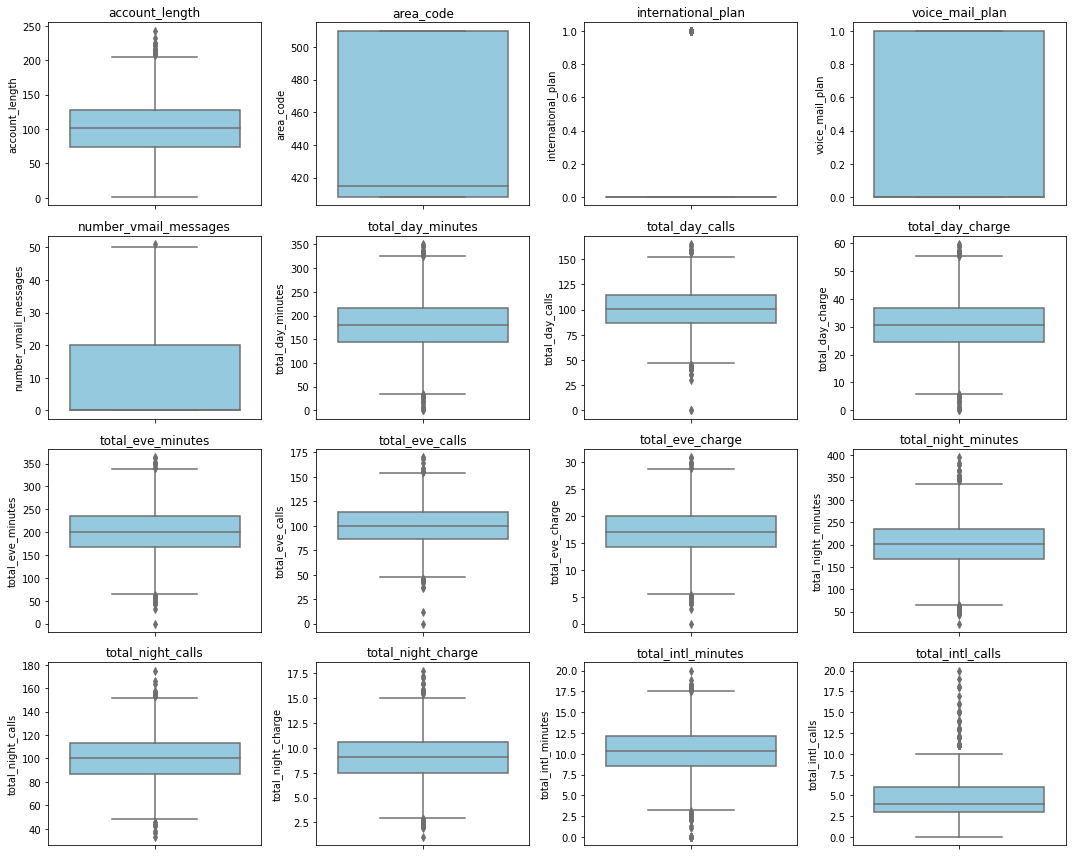

In [13]:
# Boxplots for outlier detection
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Outlier Detection Using Boxplots", fontsize=16, y=1.02)
plt.show()


### 4.3 Target Variable Distribution (churn)

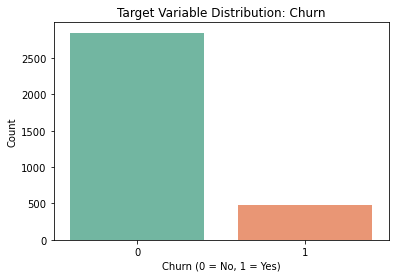

Churn rate: 14.49%


In [14]:

# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Target Variable Distribution: Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Display churn rate
churn_rate = df['churn'].mean()
print(f"Churn rate: {churn_rate:.2%}")


This image is a bar plot showing the distribution of a binary categorical variable(target variable)

**Interpretation:**

. There are two bars, each representing a class (e.g., 0 and 1).

. The left bar is significantly taller than the right one.

. This suggests class imbalance.

. The left bar (majority class) occurs much more frequently than the right bar (minority class).

### 4.4 Distribution of Numerical Features

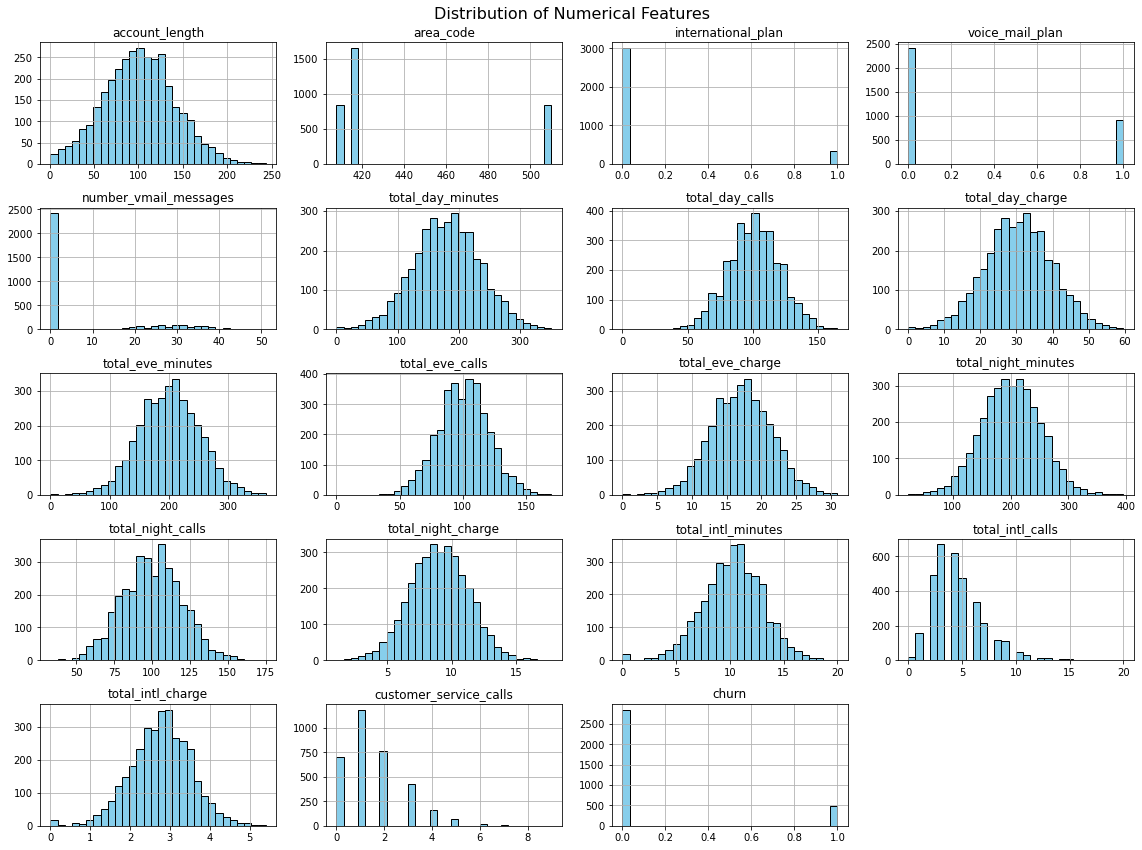

In [15]:
# Plot histograms of numerical features

df.hist(figsize=(16, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


### 4.5 Correlation Heatmap

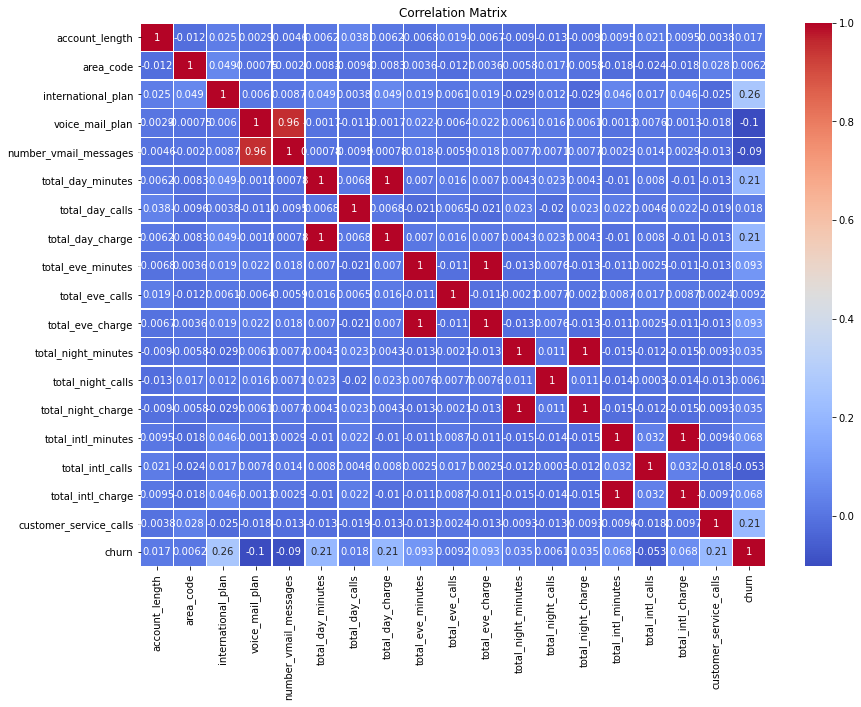

In [18]:
# Correlation matrix

plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**The visualization is a correlation heatmap**

Strongly correlated variables (e.g., total day minutes and total day charge) might provide redundant information.
Variables showing significant differences in correlations (positive or negative) with the target (churn) might be more predictive.
Features with minimal correlation (close to 0) might have limited relevance to predictive modeling unless their relationship with the target (churn) is non-linear.

### 4.6 Churn vs Key Features 

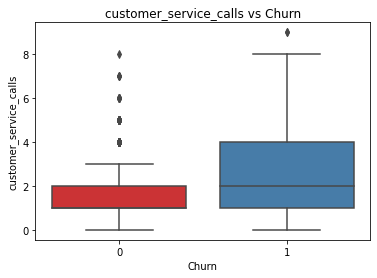

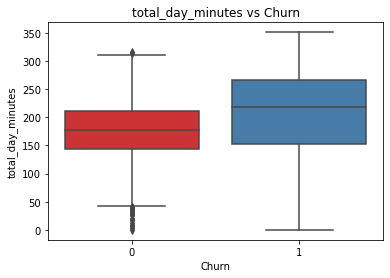

In [19]:
# Key features vs churn
key_features = ['customer_service_calls', 'total_day_minutes']
for col in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='churn', y=col, palette='Set1')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()
